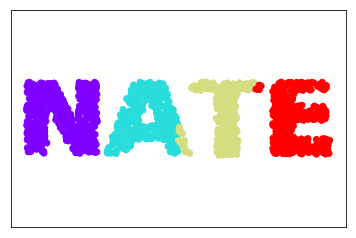

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# credit to https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html for guidance in
# creating this function

def figNate (N = 1000, rs = 42):
    fig, ax = plt.subplots(figsize = (4,1))
    ax.axis('off')
    #fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.text(.5,.5,"NATE", ha='center', va='center', weight ='bold', size = 90)
    fig.savefig('Nate.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    nate = imread('Nate.png')[::-1,:,0].T
    randpoints = np.random.RandomState(rs)
    R = randpoints.rand(4*N, 2)
    i, j = (R * nate.shape).astype(int).T
    dataMask = (nate[i,j] < 1)
    R = R[dataMask]
    R[:, 0] *= (nate.shape[0] / nate.shape[1])
#     R = R[:N]
    return R[np.argsort(R[:, 0])]

im_Nate = figNate(1000)

x=im_Nate[:,0] 
y=im_Nate[:,1]
addcol = dict(c=x, cmap = plt.cm.get_cmap('rainbow', 4))

plt.scatter(x,y, **addcol)
plt.xticks([]), plt.yticks([])
plt.axis('equal');

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

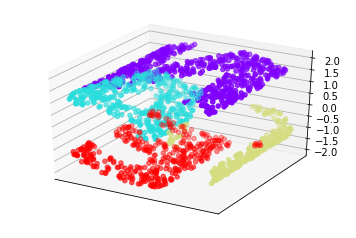

In [3]:
# make the 2D Nate embedding in 3D space in S-Shape
def S_Nate(Z):
    t = (Z[:, 0] - 2) * 0.8 * np.pi
    x = np.sin(t)
    y = Z[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

SNate = S_Nate(im_Nate)
from mpl_toolkits import mplot3d
SNate3d = plt.axes(projection='3d')
SNate3d.scatter3D(SNate[:, 0], SNate[:, 1], SNate[:, 2], **addcol);
plt.xticks([]), plt.yticks([]),

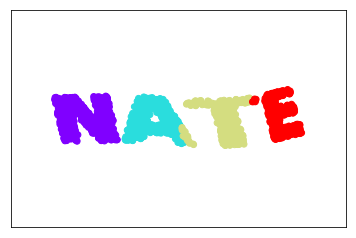

In [50]:
from sklearn.manifold import LocallyLinearEmbedding
LLEmod = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method ='modified', eigen_solver='dense')

LLEout = LLEmod.fit_transform(SNate)
fig, LLEproj = plt.subplots()
LLEproj.scatter(LLEout[:, 0], LLEout[:, 1], **addcol)
plt.xticks([]), plt.yticks([])
LLEproj.set_ylim(0.2, -0.2);

In [34]:
from sklearn.datasets import fetch_mldata
numbers = fetch_mldata('MNIST original')
numbers.data.shape
len(numbers.data[1250])

784

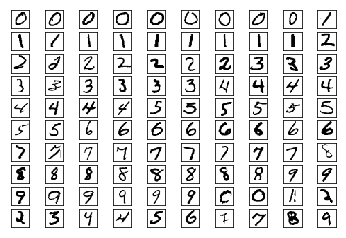

In [35]:
fig, numplt = plt.subplots(10,10, subplot_kw=dict(xticks=[], yticks=[]))
for i, axis in enumerate(numplt.flat):
    axis.imshow(numbers.data[700*i].reshape(28, 28), cmap='gray_r')

Text(0.5,1,'Isomap on Numbers')

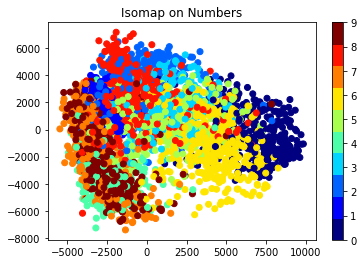

In [41]:
num = numbers.data[::20]
numTarget = numbers.target[::20]
from sklearn.manifold import Isomap
isoMod = Isomap(n_components = 2)
isoProj = isoMod.fit_transform(num)
plt.scatter(isoProj[:, 0], isoProj[:, 1], c=numTarget, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.title('Isomap on Numbers')

Text(0.5,1,'LLE on Numbers')

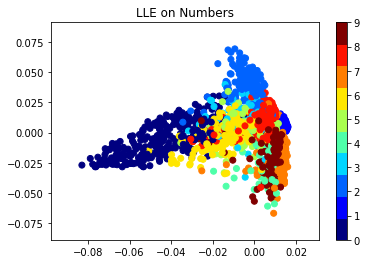

In [37]:
LLEmodNum = LocallyLinearEmbedding(n_components=2, n_neighbors=100, eigen_solver='dense', method='modified')
LLEoutNum = LLEmodNum.fit_transform(num)
plt.scatter(LLEoutNum[:,0], LLEoutNum[:,1],c=numTarget, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.title('LLE on Numbers')

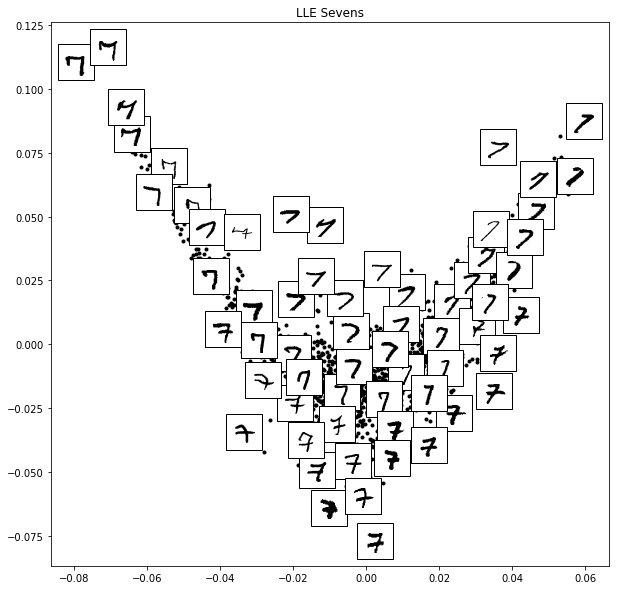

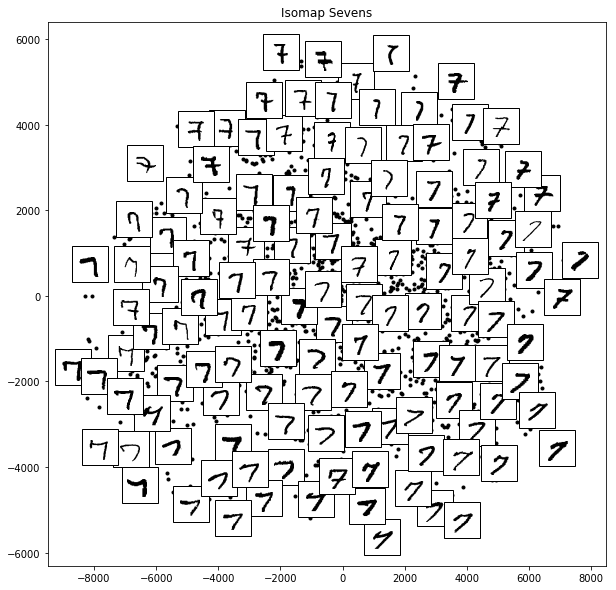

In [38]:
from matplotlib import offsetbox

# credit to https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html for this function
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
            
digit = numbers.data[numbers.target == 7][::4]

#LLE Implementation
fig, ax = plt.subplots(figsize = (10,10))
plt.title('LLE Sevens')
LLEDigitMod = LocallyLinearEmbedding(n_neighbors=100, n_components=2, eigen_solver='dense', method = 'modified')
plot_components(digit, LLEDigitMod, images = digit.reshape((-1,28,28)), ax=ax, thumb_frac = 0.05, cmap='gray_r')

#Isomap Implementation
fig, ax2 = plt.subplots(figsize = (10,10))
plt.title('Isomap Sevens')
isoDigitMod = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(digit, isoDigitMod, images = digit.reshape((-1,28,28)), ax=ax2, thumb_frac = 0.05, cmap='gray_r')

Text(0.5,0.92,'Swiss Roll Embedded in 3D')

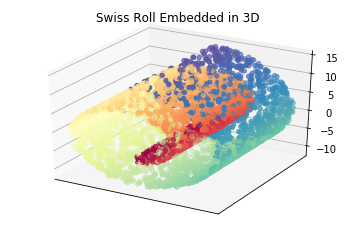

In [51]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
D, swissRoll = datasets.samples_generator.make_swiss_roll(n_samples=5000)
fig = plt.figure()
swiss = fig.add_subplot(111, projection='3d')
swiss.scatter(D[:,0], D[:,1], D[:,2],c=swissRoll, cmap=plt.cm.Spectral),
plt.xticks([]), plt.yticks([])
swiss.set_title('Swiss Roll Embedded in 3D')

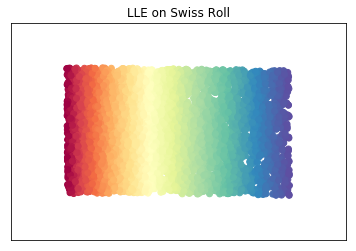

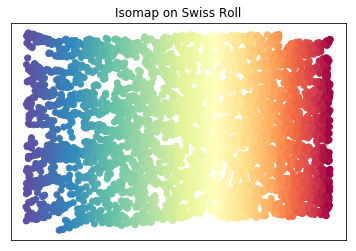

In [52]:
LLESwiss = LocallyLinearEmbedding(n_neighbors=10, n_components=2, eigen_solver='dense', method = 'modified')
LLESwissProj = LLESwiss.fit_transform(D)

fig, ax = plt.subplots()
plt.title('LLE on Swiss Roll')
plt.xticks([]), plt.yticks([])
ax.scatter(LLESwissProj[:, 0], LLESwissProj[:, 1], c=swissRoll, cmap=plt.cm.Spectral)


IsoSwiss = Isomap(n_neighbors=10, n_components=2, eigen_solver='dense')
IsoSwissProj = IsoSwiss.fit_transform(D)

fig, ax2 = plt.subplots()
plt.title('Isomap on Swiss Roll')
plt.xticks([]), plt.yticks([])
ax2.scatter(IsoSwissProj[:,0], IsoSwissProj[:,1], c=swissRoll, cmap=plt.cm.Spectral)


In [27]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is depre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning:

(2370, 2914)

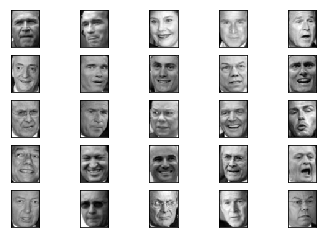

In [30]:
fig, faceplt = plt.subplots(5,5, subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(faceplt.flat):
    ax.imshow(faces.images[i], cmap='gray')


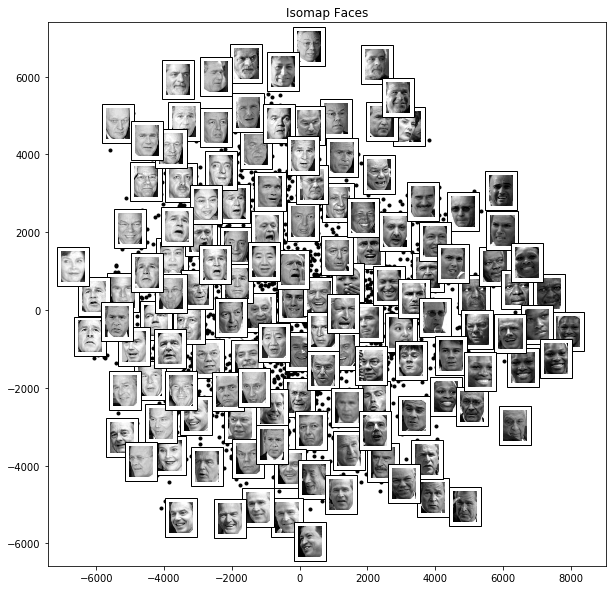

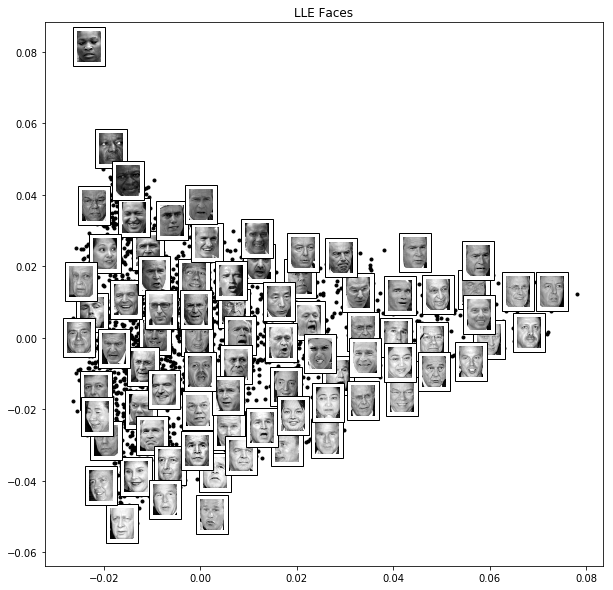

In [46]:
isoFaceMod = Isomap(n_components=2,n_neighbors=10,eigen_solver='dense')
IsoFaceProj = isoFaceMod.fit_transform(faces.data)

LLEFaceMod = LocallyLinearEmbedding(n_neighbors=10, n_components=2, eigen_solver='dense', method='modified')
LLEFaceProj = LLEFaceMod.fit_transform(faces.data)

fig, ax = plt.subplots(figsize = (10,10))
plt.title('Isomap Faces')
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

fig, ax2 = plt.subplots(figsize = (10,10))
plt.title('LLE Faces')
plot_components(faces.data, model=LocallyLinearEmbedding(n_components=2), images=faces.images[:, ::2, ::2])